Part 3 -> https://youtu.be/Y_hzMnRXjhI?feature=shared
- In this part we will create a simple model to recognize sentiment in text

we will use this data -> https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection

In [5]:
import json

file_path = "Data/Sarcasm_Headlines_Dataset_v2.json"

sentences = []
labels = []
urls = []

with open(file_path, 'r') as f:
    for line in f:
        item = json.loads(line)
        sentences.append(item['headline'])
        labels.append(item['is_sarcastic'])
        urls.append(item['article_link'])

Spliting the data

In [15]:
training_sentences = sentences[0: 20000]
testing_sentences = sentences[20000:]
training_labels = labels[0: 20000]
testing_labels = labels[20000:]

In [19]:
vocab_size = 10000
embedding_dim = 16
max_length = 100

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words=vocab_size , oov_token= "<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding='post')

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding= 'post')

In [23]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

To determine if the title is sarcastic or no we will need embedding.

In [24]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - 5ms/step - accuracy: 0.5350 - loss: 0.6888 - val_accuracy: 0.7445 - val_loss: 0.6725
Epoch 2/30
625/625 - 2s - 3ms/step - accuracy: 0.7255 - loss: 0.5601 - val_accuracy: 0.8069 - val_loss: 0.4475
Epoch 3/30
625/625 - 2s - 3ms/step - accuracy: 0.8181 - loss: 0.4122 - val_accuracy: 0.8332 - val_loss: 0.3859
Epoch 4/30
625/625 - 2s - 3ms/step - accuracy: 0.8439 - loss: 0.3587 - val_accuracy: 0.8431 - val_loss: 0.3606
Epoch 5/30
625/625 - 2s - 3ms/step - accuracy: 0.8655 - loss: 0.3169 - val_accuracy: 0.8054 - val_loss: 0.4097
Epoch 6/30
625/625 - 2s - 3ms/step - accuracy: 0.8800 - loss: 0.2857 - val_accuracy: 0.8543 - val_loss: 0.3361
Epoch 7/30
625/625 - 2s - 4ms/step - accuracy: 0.8969 - loss: 0.2569 - val_accuracy: 0.8562 - val_loss: 0.3325
Epoch 8/30
625/625 - 2s - 3ms/step - accuracy: 0.9017 - loss: 0.2416 - val_accuracy: 0.8458 - val_loss: 0.3527
Epoch 9/30
625/625 - 2s - 4ms/step - accuracy: 0.9065 - loss: 0.2302 - val_accuracy: 0.8582 - val_loss: 0.3328
E

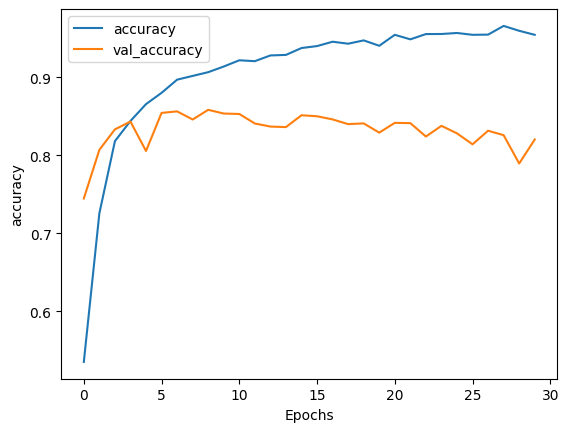

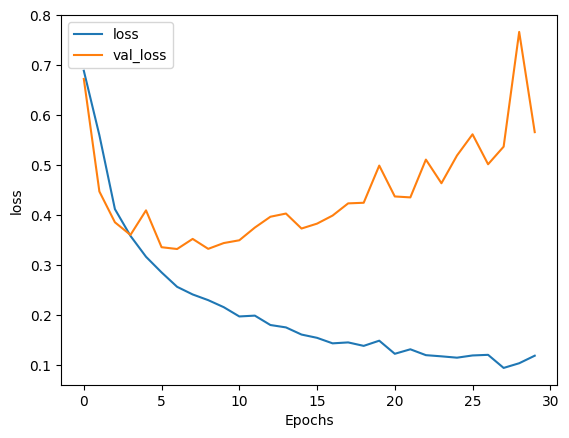

In [28]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [27]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding='post')
print(model.predict(padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
[[0.10544845]
 [0.0021011 ]]
